# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

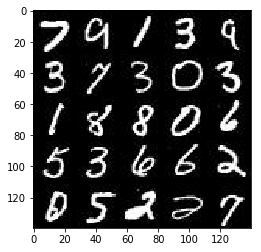

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

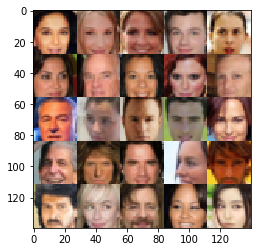

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x = tf.layers.conv2d(images, 64, kernel_size=[5,5], padding='same', strides=1)
        x = tf.maximum(0.2 * x, x)
        
        x1 = tf.layers.conv2d(x, 128, kernel_size=[5,5], padding='same', strides=2)
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.2 * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 256, kernel_size=[5,5], padding='same', strides=2)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.2 * x2, x2)
        
        x3 = tf.layers.conv2d(x2, 512, kernel_size=[5,5], padding='same', strides=2)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(0.2 * x3, x3)
        
        t_shape = x3.get_shape().as_list()
        flat = tf.reshape(x3, (-1, t_shape[1]*t_shape[2]*t_shape[3]))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = False
    if not is_train:
        reuse = True
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x = tf.layers.dense(z, 7*7*512, activation=None)
        x = tf.reshape(x, (-1,7,7,512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # First transpose convolution - 14X14X256
        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # Second transpose convolution - 28X28X128
        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # Third transpose convolution - 28X28X64
        
        x = tf.layers.conv2d_transpose(x, 64, 5, strides=1, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, padding='same')
        
        
        # Output layer, 28X28Xout_channel_dim        
        out = tf.tanh(logits)
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learn_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
        
    input_real, input_z, learning_rate= model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: learn_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, learning_rate: learn_rate, input_real: batch_images})
                
                if steps % 100 == 0:
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode)
                
                if steps % 10 == 0:
    
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images, learning_rate: learn_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, learning_rate: learn_rate, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 3.0358... Generator Loss: 0.3123
Epoch 1/2... Discriminator Loss: 4.7823... Generator Loss: 0.0391
Epoch 1/2... Discriminator Loss: 1.3678... Generator Loss: 2.6305
Epoch 1/2... Discriminator Loss: 0.6281... Generator Loss: 2.5673
Epoch 1/2... Discriminator Loss: 0.6237... Generator Loss: 2.3540
Epoch 1/2... Discriminator Loss: 1.2348... Generator Loss: 1.8492
Epoch 1/2... Discriminator Loss: 1.5921... Generator Loss: 0.4928
Epoch 1/2... Discriminator Loss: 1.0006... Generator Loss: 1.5950
Epoch 1/2... Discriminator Loss: 1.2684... Generator Loss: 1.0345


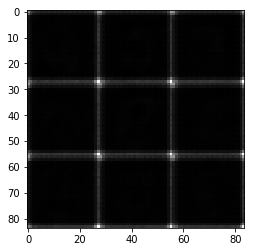

Epoch 1/2... Discriminator Loss: 1.1342... Generator Loss: 0.9867
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 1.7296
Epoch 1/2... Discriminator Loss: 0.9036... Generator Loss: 1.4918
Epoch 1/2... Discriminator Loss: 1.1859... Generator Loss: 0.7334
Epoch 1/2... Discriminator Loss: 0.9855... Generator Loss: 1.7216
Epoch 1/2... Discriminator Loss: 1.2076... Generator Loss: 0.7075
Epoch 1/2... Discriminator Loss: 1.2210... Generator Loss: 0.7425
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.8440
Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.3193
Epoch 1/2... Discriminator Loss: 1.3761... Generator Loss: 2.9013


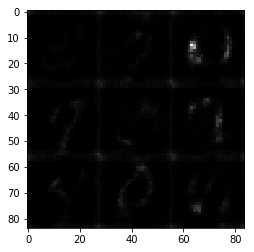

Epoch 1/2... Discriminator Loss: 0.8697... Generator Loss: 1.7922
Epoch 1/2... Discriminator Loss: 1.9756... Generator Loss: 0.3162
Epoch 1/2... Discriminator Loss: 0.8860... Generator Loss: 1.1940
Epoch 1/2... Discriminator Loss: 1.1641... Generator Loss: 0.7934
Epoch 1/2... Discriminator Loss: 1.4455... Generator Loss: 0.5352
Epoch 1/2... Discriminator Loss: 1.0058... Generator Loss: 0.9657
Epoch 1/2... Discriminator Loss: 0.9452... Generator Loss: 1.0801
Epoch 1/2... Discriminator Loss: 0.8942... Generator Loss: 1.4405
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 0.6894
Epoch 1/2... Discriminator Loss: 1.0277... Generator Loss: 2.0327


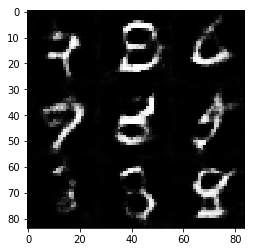

Epoch 1/2... Discriminator Loss: 0.9560... Generator Loss: 1.9858
Epoch 1/2... Discriminator Loss: 1.0931... Generator Loss: 0.7577
Epoch 1/2... Discriminator Loss: 0.9341... Generator Loss: 1.6311
Epoch 1/2... Discriminator Loss: 1.0430... Generator Loss: 2.2836
Epoch 1/2... Discriminator Loss: 0.8515... Generator Loss: 1.2402
Epoch 1/2... Discriminator Loss: 2.6043... Generator Loss: 3.8178
Epoch 1/2... Discriminator Loss: 0.9347... Generator Loss: 1.3633
Epoch 1/2... Discriminator Loss: 0.8284... Generator Loss: 1.3043
Epoch 1/2... Discriminator Loss: 0.8372... Generator Loss: 1.2320
Epoch 1/2... Discriminator Loss: 1.6921... Generator Loss: 0.5021


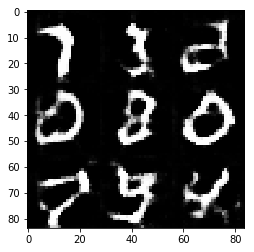

Epoch 1/2... Discriminator Loss: 1.2300... Generator Loss: 0.7563


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print (mnist_dataset.shape)
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4762... Generator Loss: 3.3630
Epoch 1/1... Discriminator Loss: 0.4262... Generator Loss: 3.0858
Epoch 1/1... Discriminator Loss: 0.9451... Generator Loss: 6.9481
Epoch 1/1... Discriminator Loss: 0.4897... Generator Loss: 3.8377
Epoch 1/1... Discriminator Loss: 0.7042... Generator Loss: 1.5037
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 1.1482
Epoch 1/1... Discriminator Loss: 0.5972... Generator Loss: 2.3390
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 0.5373... Generator Loss: 2.5075


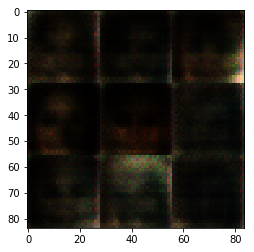

Epoch 1/1... Discriminator Loss: 0.5307... Generator Loss: 3.0822
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 3.6392
Epoch 1/1... Discriminator Loss: 0.8145... Generator Loss: 1.2005
Epoch 1/1... Discriminator Loss: 1.9862... Generator Loss: 0.3267
Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 2.2725
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 5.0981
Epoch 1/1... Discriminator Loss: 0.5928... Generator Loss: 1.9170
Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 6.3785


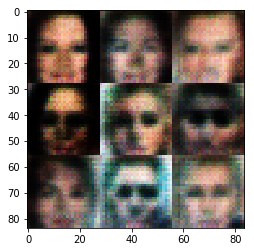

Epoch 1/1... Discriminator Loss: 1.5745... Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 2.9394
Epoch 1/1... Discriminator Loss: 0.6500... Generator Loss: 1.7569
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 1.2296
Epoch 1/1... Discriminator Loss: 1.8607... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 1.0796... Generator Loss: 0.9957
Epoch 1/1... Discriminator Loss: 0.5800... Generator Loss: 2.3837
Epoch 1/1... Discriminator Loss: 0.5618... Generator Loss: 2.0561
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 4.1064
Epoch 1/1... Discriminator Loss: 0.6764... Generator Loss: 1.5802


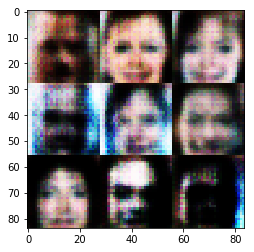

Epoch 1/1... Discriminator Loss: 0.5986... Generator Loss: 1.8270
Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 2.7845
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 0.4958... Generator Loss: 2.5774
Epoch 1/1... Discriminator Loss: 1.5960... Generator Loss: 0.4596
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 3.0172
Epoch 1/1... Discriminator Loss: 0.7654... Generator Loss: 1.2958
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 5.5679
Epoch 1/1... Discriminator Loss: 0.5148... Generator Loss: 3.0861
Epoch 1/1... Discriminator Loss: 1.5156... Generator Loss: 0.5100


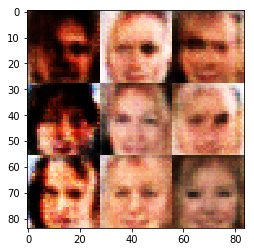

Epoch 1/1... Discriminator Loss: 0.5023... Generator Loss: 3.5659
Epoch 1/1... Discriminator Loss: 0.4401... Generator Loss: 3.7336
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 4.5677
Epoch 1/1... Discriminator Loss: 1.1154... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 0.6644... Generator Loss: 1.5811
Epoch 1/1... Discriminator Loss: 1.8103... Generator Loss: 5.5481
Epoch 1/1... Discriminator Loss: 0.4709... Generator Loss: 3.3986
Epoch 1/1... Discriminator Loss: 0.4439... Generator Loss: 3.3330
Epoch 1/1... Discriminator Loss: 0.7595... Generator Loss: 6.1884
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.5289


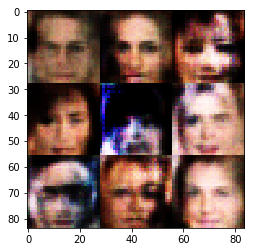

Epoch 1/1... Discriminator Loss: 0.6071... Generator Loss: 2.1971
Epoch 1/1... Discriminator Loss: 0.5374... Generator Loss: 2.3333
Epoch 1/1... Discriminator Loss: 1.5318... Generator Loss: 4.2559
Epoch 1/1... Discriminator Loss: 0.6761... Generator Loss: 1.5068
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 1.2316
Epoch 1/1... Discriminator Loss: 0.6608... Generator Loss: 1.6060
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 3.3278
Epoch 1/1... Discriminator Loss: 0.6907... Generator Loss: 1.5046
Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 5.0938
Epoch 1/1... Discriminator Loss: 0.8240... Generator Loss: 7.8490


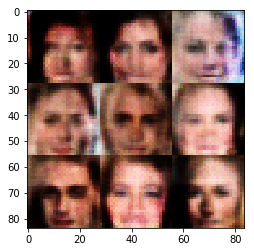

Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 1.6317
Epoch 1/1... Discriminator Loss: 0.5642... Generator Loss: 1.8851
Epoch 1/1... Discriminator Loss: 0.5732... Generator Loss: 2.1880
Epoch 1/1... Discriminator Loss: 0.4967... Generator Loss: 2.2784
Epoch 1/1... Discriminator Loss: 1.7920... Generator Loss: 0.4687
Epoch 1/1... Discriminator Loss: 0.4714... Generator Loss: 3.4289
Epoch 1/1... Discriminator Loss: 0.4409... Generator Loss: 2.8490
Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 3.4843
Epoch 1/1... Discriminator Loss: 0.4281... Generator Loss: 3.4362
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 3.9493


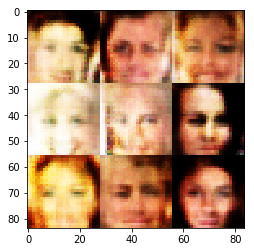

Epoch 1/1... Discriminator Loss: 0.4079... Generator Loss: 3.1816
Epoch 1/1... Discriminator Loss: 0.6233... Generator Loss: 1.5685
Epoch 1/1... Discriminator Loss: 0.3842... Generator Loss: 4.5553
Epoch 1/1... Discriminator Loss: 0.4621... Generator Loss: 2.3955
Epoch 1/1... Discriminator Loss: 0.7082... Generator Loss: 5.9150
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 4.6126
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 6.5619
Epoch 1/1... Discriminator Loss: 0.4013... Generator Loss: 3.4763
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 0.5328... Generator Loss: 2.0484


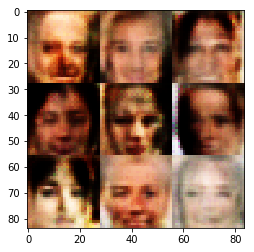

Epoch 1/1... Discriminator Loss: 0.3549... Generator Loss: 6.5028
Epoch 1/1... Discriminator Loss: 0.3615... Generator Loss: 5.1652
Epoch 1/1... Discriminator Loss: 0.3504... Generator Loss: 5.1553
Epoch 1/1... Discriminator Loss: 0.3626... Generator Loss: 4.2904
Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 6.3418
Epoch 1/1... Discriminator Loss: 0.3567... Generator Loss: 4.4043
Epoch 1/1... Discriminator Loss: 0.3855... Generator Loss: 3.4728
Epoch 1/1... Discriminator Loss: 0.4887... Generator Loss: 3.8719
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 0.5481... Generator Loss: 2.4307


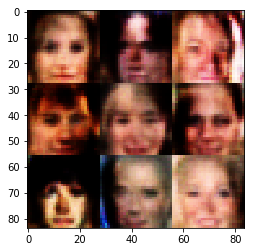

Epoch 1/1... Discriminator Loss: 0.4138... Generator Loss: 2.9808
Epoch 1/1... Discriminator Loss: 0.5857... Generator Loss: 1.6900
Epoch 1/1... Discriminator Loss: 0.4464... Generator Loss: 2.5686
Epoch 1/1... Discriminator Loss: 0.4220... Generator Loss: 2.7973
Epoch 1/1... Discriminator Loss: 0.4073... Generator Loss: 7.8156
Epoch 1/1... Discriminator Loss: 0.6232... Generator Loss: 1.6703
Epoch 1/1... Discriminator Loss: 0.3760... Generator Loss: 6.0411
Epoch 1/1... Discriminator Loss: 0.4879... Generator Loss: 2.2186
Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 4.5276
Epoch 1/1... Discriminator Loss: 0.4329... Generator Loss: 2.6580


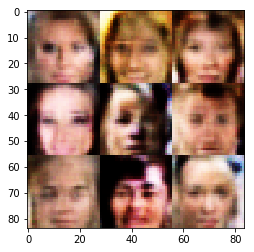

Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 2.6702
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 2.1472
Epoch 1/1... Discriminator Loss: 0.3460... Generator Loss: 7.3448
Epoch 1/1... Discriminator Loss: 2.0989... Generator Loss: 0.2785
Epoch 1/1... Discriminator Loss: 0.5337... Generator Loss: 2.0821
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 2.8254
Epoch 1/1... Discriminator Loss: 0.3983... Generator Loss: 4.3298
Epoch 1/1... Discriminator Loss: 0.4925... Generator Loss: 2.2075
Epoch 1/1... Discriminator Loss: 0.3692... Generator Loss: 3.9821
Epoch 1/1... Discriminator Loss: 0.3515... Generator Loss: 4.6386


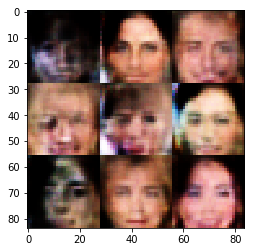

Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 6.0427
Epoch 1/1... Discriminator Loss: 1.6784... Generator Loss: 0.4362
Epoch 1/1... Discriminator Loss: 0.5217... Generator Loss: 6.7969
Epoch 1/1... Discriminator Loss: 0.3648... Generator Loss: 4.7588
Epoch 1/1... Discriminator Loss: 0.4389... Generator Loss: 2.6042
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 2.0286
Epoch 1/1... Discriminator Loss: 0.3796... Generator Loss: 3.8548
Epoch 1/1... Discriminator Loss: 0.4479... Generator Loss: 2.7923
Epoch 1/1... Discriminator Loss: 0.8810... Generator Loss: 5.0007
Epoch 1/1... Discriminator Loss: 0.6685... Generator Loss: 8.2536


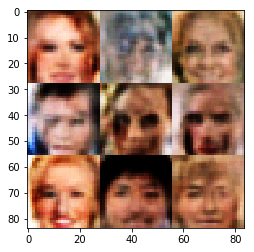

Epoch 1/1... Discriminator Loss: 0.3447... Generator Loss: 5.7736
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 2.8010
Epoch 1/1... Discriminator Loss: 0.4232... Generator Loss: 3.4043
Epoch 1/1... Discriminator Loss: 0.3771... Generator Loss: 6.8314
Epoch 1/1... Discriminator Loss: 0.3779... Generator Loss: 3.5245
Epoch 1/1... Discriminator Loss: 0.3623... Generator Loss: 4.8273
Epoch 1/1... Discriminator Loss: 0.3468... Generator Loss: 6.0475
Epoch 1/1... Discriminator Loss: 2.4103... Generator Loss: 0.2323
Epoch 1/1... Discriminator Loss: 0.8204... Generator Loss: 1.1874
Epoch 1/1... Discriminator Loss: 0.5558... Generator Loss: 2.5646


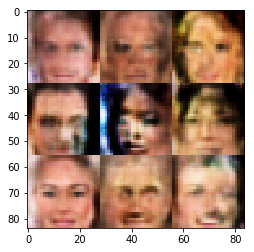

Epoch 1/1... Discriminator Loss: 0.3761... Generator Loss: 4.1190
Epoch 1/1... Discriminator Loss: 0.6212... Generator Loss: 1.6717
Epoch 1/1... Discriminator Loss: 0.3591... Generator Loss: 5.0905
Epoch 1/1... Discriminator Loss: 0.3548... Generator Loss: 5.5644
Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 2.9830
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 5.3690
Epoch 1/1... Discriminator Loss: 0.3866... Generator Loss: 4.9508
Epoch 1/1... Discriminator Loss: 0.3710... Generator Loss: 8.1022
Epoch 1/1... Discriminator Loss: 0.3545... Generator Loss: 5.3030
Epoch 1/1... Discriminator Loss: 0.3708... Generator Loss: 4.3715


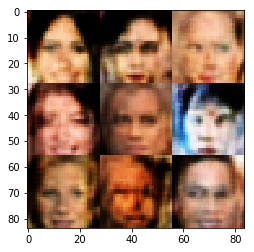

Epoch 1/1... Discriminator Loss: 0.3439... Generator Loss: 7.5444
Epoch 1/1... Discriminator Loss: 0.4057... Generator Loss: 3.0376
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 2.8151
Epoch 1/1... Discriminator Loss: 0.3436... Generator Loss: 5.7893
Epoch 1/1... Discriminator Loss: 0.4082... Generator Loss: 6.8058
Epoch 1/1... Discriminator Loss: 4.3285... Generator Loss: 0.0337
Epoch 1/1... Discriminator Loss: 1.0530... Generator Loss: 2.2687
Epoch 1/1... Discriminator Loss: 0.8526... Generator Loss: 1.1800
Epoch 1/1... Discriminator Loss: 0.9198... Generator Loss: 0.9713


IndexError: list index out of range

In [ ]:
batch_size = 128
z_dim = 120
learning_rate = .0001
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.